# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


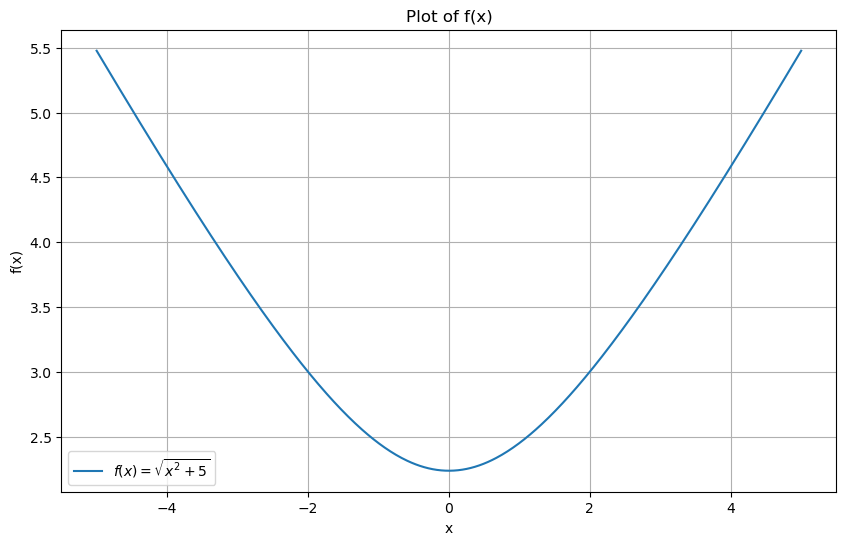

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5) #just turing whats given into a function

# Plot the function f(x), np.linspace might be helpful.
x_vals = np.linspace(-5, 5, 500) #using linspace for points
y_vals = f(x_vals) #using the function to get y values 
plt.figure(figsize=(10, 6)) #making plot look bigger
plt.plot(x_vals, y_vals, label=r"$f(x) = \sqrt{x^2 + 5}$") #plotting our points and giving a label
plt.xlabel("x") #labeling axis
plt.ylabel("f(x)")
plt.title("Plot of f(x)") #giving a title 
plt.legend()
plt.grid()
plt.show()



x_T after 50 iterations is 5.313021092124361e-13


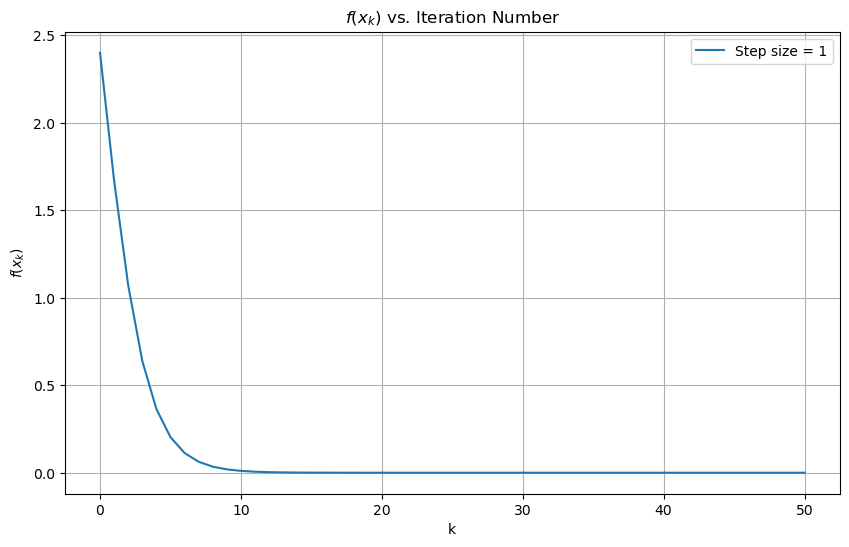

In [2]:
# Define the derivative of the function f(x), for gradient descent
def grad_des(x):
    return x / np.sqrt(x**2 + 5) #found derv by hand

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def grad_des_algo(x_0, step_size, num_iterations):
    x_values = [x_0]  #this is our starting value
    for _ in range(num_iterations): #dont use i becuase we arent using it 
        grad = grad_des(x_values[-1]) #getting the gradient by getting the last value in the x_values list
        x_new = x_values[-1] - step_size * grad #this now gives us our new value
        x_values.append(x_new) #appending our new x we just found
    return x_values

# set up/assign initial values
last_digit_id = 7 #just doing what is given
x_0 = last_digit_id / 5 + 1  
num_iterations = 50 
step_size = 1 

# Run gradient descent by calling the function
x_k_values = grad_des_algo(x_0, step_size, num_iterations) #using the algo we made for the xk values

# report x_T by printing out the value
print(f"x_T after {num_iterations} iterations is {x_k_values[-1]}") #printing our x_t by picking the last value in our append

# Plot the f(x_k) values vs. iteration number
plt.figure(figsize=(10, 6)) #just doing normal plotting 
plt.plot(range(len(x_k_values)), x_k_values, label=f"Step size = {step_size}") #picking our x values as the length of x_k which is 50
plt.xlabel("k")
plt.ylabel(r"$f(x_k)$")
plt.title(r"$f(x_k)$ vs. Iteration Number")
plt.legend()
plt.grid()
plt.show()


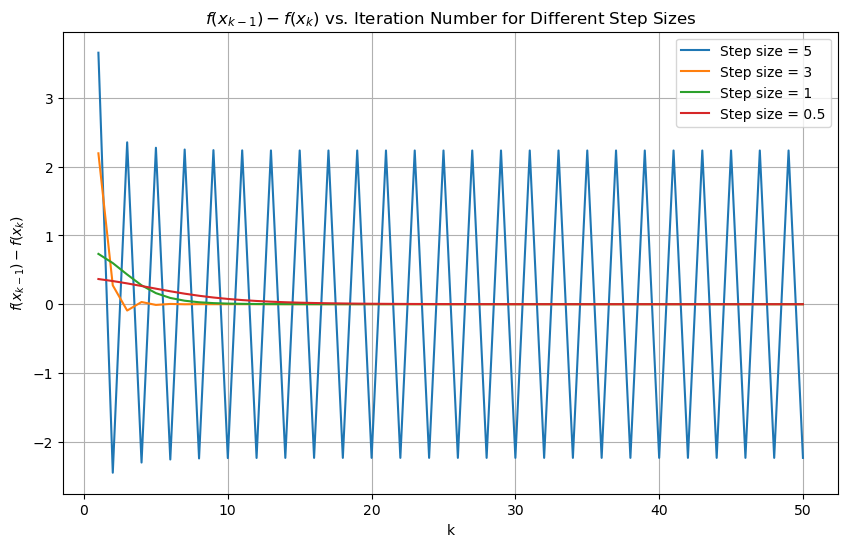

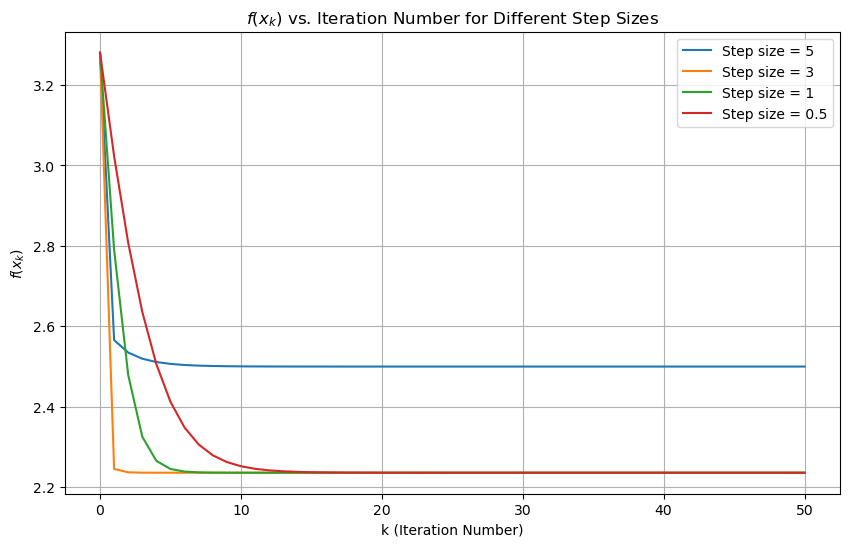

In [3]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
diff_step_size_vals = []

# loop through the step sizes and perform GD and record results
for i in step_sizes: #starting a for loop to go thru the different step sizes i have 
    x_k_values = grad_des_algo(x_0, i, num_iterations) #running the algo from before 
    differences = [x_k_values[i - 1] - x_k_values[i] for i in range(1, len(x_k_values))] 
    #the first part is finding the difference of xk-1 and xk, the loop is starting at 1 and going to the length of the xk vals so our list looks like x0-x1, x1-x2, ..., xn-1-xn
    diff_step_size_vals.append(differences) #storing all of the differences for plotting 

# plot multiple curves in a single graph
plt.figure(figsize=(10, 6)) #making plot bigger
for i, step_size in enumerate(step_sizes): #enumerate is taking i=0 and step_sizes=5 which we need the index and value for the graph
    plt.plot(range(1, num_iterations + 1), diff_step_size_vals[i], label=f"Step size = {step_size}") #first part is our x vals starting from 1 and going to 50, we add 1 to get 50 points and y vals is our diff step size vals for that i index we are on

# Final plot for all step sizes
plt.xlabel("k")
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")
plt.title(r"$f(x_{k-1}) - f(x_k)$ vs. Iteration Number for Different Step Sizes")
plt.legend()
plt.grid()
plt.show()

#not all step size values decrease, in our example step size of 5 does not always decreases, it keeps going up and going down, however all the others do decrease as number of iterations go up


#plottng the xk for each step size 
step_sizes = [5, 3, 1, 0.5]  
f_vals_step_size = []   

#this is bascailly the same step as part 4
for step_size in step_sizes:
    x_k_values = grad_des_algo(x_0, step_size, num_iterations) 
    f_vals = [f(x) for x in x_k_values]
    f_vals_step_size.append(f_vals)  

plt.figure(figsize=(10, 6))  
for i, step_size in enumerate(step_sizes): 
    plt.plot(range(len(f_vals_step_size[i])), f_vals_step_size[i], label=f"Step size = {step_size}")

# Final plot customization
plt.xlabel("k (Iteration Number)")
plt.ylabel(r"$f(x_k)$")
plt.title(r"$f(x_k)$ vs. Iteration Number for Different Step Sizes")
plt.legend()
plt.grid()
plt.show()


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.590092508012283
Coefficients: [3.61547842 0.21448024]


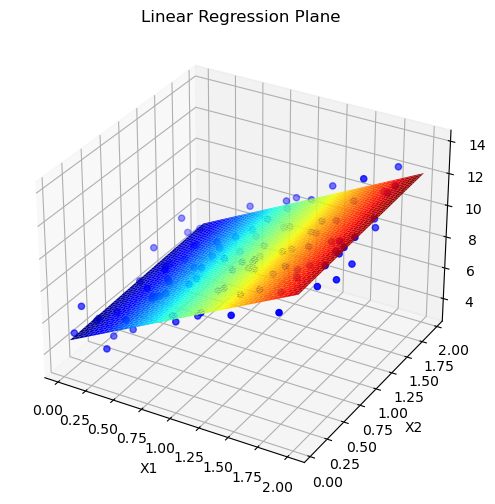

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(77)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
b = np.c_[np.ones((X.shape[0], 1)), X] #this is adding a column of 1 that is the same shape as X into X

# Find theta using the normal equation
theta = np.linalg.inv(b.T @ b) @ (b.T @ y) #this is the normal equation and theta is the inverse of it

# Print the intercept and coefficients of the regression plane
intercept = theta[0] #our intercept is the first index of theta
coefficients = theta[1:] #the coefficients is the 2nd column to the nth column which is what 1: is doing
print("Intercept:", intercept) #printing our values
print("Coefficients:", coefficients)

# Plot the generated data and the regression plane
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100) #this is making a linspace looking at X, takes all rows in first column and taking the min and max for plotting with 100 points
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100) #same thing but all rows in the second column
x1_meshgrid, x2_meshgrid = np.meshgrid(x1,x2) #turing it into a mesh grid for plotting
y_hat = theta[0] + theta[1] * x1_meshgrid + theta[2] * x2_meshgrid #this gives us our y hat aka predictions from the linear regression

fig = plt.figure(figsize=(10, 6)) #starting to form our graph
plot = fig.add_subplot(111, projection='3d') #this is making sure we are making a 3d plot that is also a subplot 
plot.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points') #we are making a scatter plot of our values
plot.plot_surface(x1_meshgrid, x2_meshgrid, y_hat, cmap = "jet") #this is our predicted values plotting with our actual values
plot.set_xlabel("X1") #labelling graph
plot.set_ylabel("X2")
plot.set_title("Linear Regression Plane")
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [5]:
import numpy as np
import matplotlib.pyplot as plt #importting what we need

def sigmoid(z): #making our sigmoid funtion for later use
    return 1 / (1 + np.exp(-z)) #it does it by making the input values go between 0 and 1


np.random.seed(595) #making data consistent 
X = np.random.rand(2, 100) #making a 2x100 random matrix, it has 2 features and is from 0 to 1 containing 100 data points
w_true = np.array([1.5, -2.5]) #this is what our true weights are for the 2 features 
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true) #this is calcualting our probabilitiies of what we have by taking dot product of weights and features 
Y = (probabilities > 0.5).astype(int) #turing it into an integer of prob > 0.5
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100) #this is making noise for our data 

X_train, X_test = X[:,:80], X[:,80:] #splitting our data to train it, picking the first 80 for training and the last 20 for testing
Y_train, Y_test = Y[:80], Y[80:] #this is doing the same thing 

w = np.zeros(X.shape[0]) #this is initializing our weighted vector as well as bias to be 0
b = 0.0
learning_rate = .1 #started at 5.595
num_epochs = 1000 #started at 595
#after trail and error this seems to be the best, it gives the best test set accuracy while aslo not taking too long to get there

for epoch in range(num_epochs): #this is grad descent 
    A_train = sigmoid(np.dot(w.T, X_train) + b) #this is giving us our predicited probs with our train data by taking dot product and adding bias, doing sigmoid to get a probability 

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) #this is getting the gradient by taking the error between the data and then the dot product with the trained data and divide by the length of the trained data  
    dJdb = np.mean(A_train - Y_train) #getting the average of the errors for all the data

    w -= learning_rate * dJdw #this is updating what our new weights and bias will be to continue our for loop
    b -= learning_rate * dJdb

A_train = sigmoid(np.dot(w.T, X_train) + b) #getting our predictioned probs for the trained data
predictions_train = (A_train > 0.5).astype(int) #if its above 0.5, making it an int

A_test = sigmoid(np.dot(w.T, X_test) + b) #same thing as above but for our test data 
predictions_test = (A_test > 0.5).astype(int)  #if its above 0.5, making it an int

train_accuracy = np.mean(predictions_train == Y_train) #this is giving how accurate our trained data is

test_accuracy = np.mean(predictions_test == Y_test) #same as above but getting the tested data 

print(f"Training Set Accuracy: {train_accuracy:.2f}") #printing our results 
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


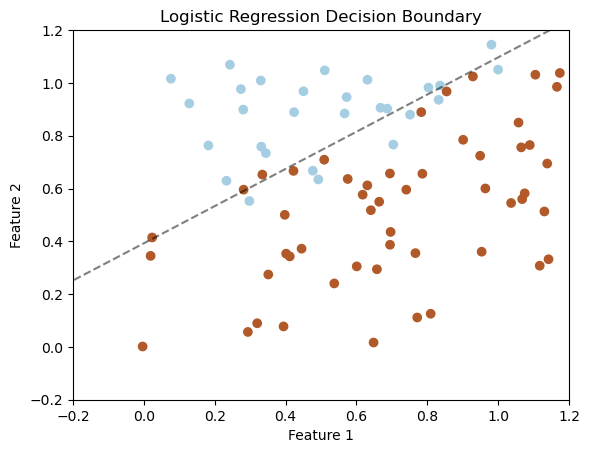

In [6]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired) #this is getting our trained data plotted by making a scatter plot
plt.xlim(-0.2, 1.2) #limits for our x and y axis 
plt.ylim(-0.2, 1.2)
ax = plt.gca() #current plot axis 

xlim = ax.get_xlim() #this gives our x axis limit and below gets our y limit 
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)) #this makes a grid for our points to make graph
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b #we flatten the 2d into 1d and then back into a 2d with our data from meshgrid then takes the dot product of that with the weights transposed and adding bias at the end
Z = sigmoid(Z) #applying the sigmoid funtion for new Z
Z = Z.reshape(xx.shape) #make z the same shape as our xx to grapg 
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--']) #graphing our points now, have a line at 0.5 which is the decision boundary, alpha for transparency and the linestyle for the line we just made

plt.xlabel('Feature 1') #this plot is for our train data 
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

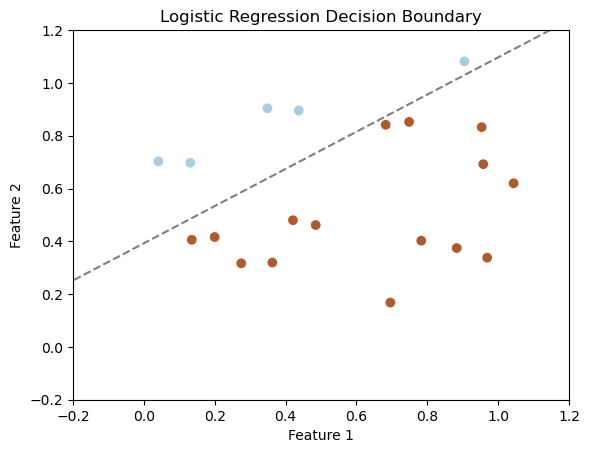

In [7]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1') #this is the same as the comments before but this is for our test data 
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5